In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Melakukan Unzip Dataset**

In [ ]:
import os
import shutil
import zipfile

# Melakukan ekstraksi pada file zip
local_zip = '/content/drive/MyDrive/Colab Notebooks/dataset/DataLungCancer.zip'
extract_to = '/content/drive/MyDrive/Colab Notebooks/dataset/lungcancer'

# Membuka dan mengekstrak file zip
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Path dasar dari folder yang diekstrak
base_dir = extract_to

# Mendefinisikan direktori train dan validation
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Mendefinisikan direktori untuk setiap kategori
normal_dir = os.path.join(base_dir, 'Normal cases')
benign_dir = os.path.join(base_dir, 'Benign cases')
malignant_dir = os.path.join(base_dir, 'Malignant cases')

print("Ekstraksi selesai. Direktori train:", train_dir)
print("Ekstraksi selesai. Direktori val:", validation_dir)


KeyboardInterrupt: 

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/lungcancer/The IQ-OTHNCCD lung cancer dataset'

normal_dir = os.path.join(base_dir, 'Normal cases')
benign_dir = os.path.join(base_dir, 'Bengin cases')
malignant_dir = os.path.join(base_dir, 'Malignant cases')

os.makedirs(normal_dir, exist_ok=True)
os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)

In [ ]:
# Fungsi untuk membagi data ke dalam direktori train dan val
def split_data(source_dir, train_dir, val_dir, split_ratio=0.8):
    files = os.listdir(source_dir)
    num_train = int(len(files) * split_ratio)
    train_files = files[:num_train]
    val_files = files[num_train:]

    category = os.path.basename(source_dir)

    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)

    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(val_category_dir, exist_ok=True)

    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_category_dir, file))

    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(val_category_dir, file))

# Membagi data untuk setiap kategori
split_data(normal_dir, train_dir, validation_dir)
split_data(benign_dir, train_dir, validation_dir)
split_data(malignant_dir, train_dir, validation_dir)

NameError: name 'train_dir' is not defined

In [ ]:
# Menggunakan ImageDataGenerator untuk mengelola batch data gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Generate batches of tensor image data from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Adjust based on your model's input size
    batch_size=32,
    class_mode='categorical'  # Use 'binary' for binary classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

NameError: name 'train_dir' is not defined

# **Membuat Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Mendefinisikan dimensi input gambar
img_height, img_width = 150, 150

# Membuat model sequential
model = Sequential()

# Menambahkan layer konvolusi dan pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Menambahkan layer fully-connected
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Output layer dengan 3 kelas

# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
# compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Membuat callback untuk menyimpan model terbaik
filepath = 'best_model.epoch{epoch:02d}-val_loss{val_loss:.2f}.h5'
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,  # Menyimpan model lengkap, bukan hanya bobot
    mode='min'
)
callbacks = [checkpoint]

In [ ]:
print(train_generator.batch_size)

20


# **Melatih Model**

In [ ]:
# training model
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=5,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/15
25/25 [==============================] - ETA: 0s - loss: 1.0754 - accuracy: 0.4320
Epoch 1: val_loss improved from inf to 1.00501, saving model to best_model.epoch01-val_loss1.01.h5
25/25 [==============================] - 44s 2s/step - loss: 1.0754 - accuracy: 0.4320 - val_loss: 1.0050 - val_accuracy: 0.5300
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 1.0148 - accuracy: 0.4920
Epoch 2: val_loss did not improve from 1.00501
25/25 [==============================] - 34s 1s/step - loss: 1.0148 - accuracy: 0.4920 - val_loss: 1.0068 - val_accuracy: 0.4700
Epoch 3/15
25/25 [==============================] - ETA: 0s - loss: 0.9988 - accuracy: 0.4840
Epoch 3: val_loss improved from 1.00501 to 0.97461, saving model to best_model.epoch03-val_loss0.97.h5
25/25 [==============================] - 33s 1s/step - loss: 0.9988 - accuracy: 0.4840 - val_loss: 0.9746 - val_accuracy: 0.4800
Epoch 4/15
25/25 [==============================] - ETA: 0s - loss: 0.9761 - accuracy: 0.4840
Epoch 4: val_loss did not improve from 0.97461
25/25 [==============================] - 34s 1s/step - loss: 0.9761 - accuracy: 0.4840 - val_loss: 1.0117 - val_accuracy: 0.4500
Epoch 5/15
25/25 [==============================] - ETA: 0s - loss: 1.0059 - accuracy: 0.5202
Epoch 5: val_loss did not improve from 0.97461
25/2

# **Hasil Akhir**

Masukkan path file gambar: /content/drive/MyDrive/Colab Notebooks/dataset/lungcancer/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg
Prediksi untuk gambar: /content/drive/MyDrive/Colab Notebooks/dataset/lungcancer/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg


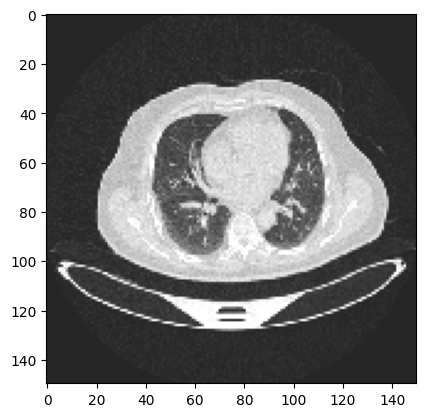

1/1 [==============================] - 0s 147ms/step
[[3.5662289e-15 9.9921596e-01 7.8402989e-04]]
Malignant


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memprediksi kelas gambar
def predict_image(path, model):
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=1)
    print(classes)
    if classes[0][0] == 1:
        print('Normal')
    elif classes[0][1] == 1:
        print('Benign')
    else:
        print('Malignant')

# Meminta pengguna untuk memasukkan path file gambar
file_path = input("Masukkan path file gambar: ")

# Melakukan prediksi untuk gambar yang diberikan
print(f"Prediksi untuk gambar: {file_path}")
predict_image(file_path, model)